#### 참고 : 해당 글은 Youtube 오늘코드 페이지를 운영하시는 corazzon님의 강의내용과 코드를 따라하며 학습한것입니다.

##### URL : https://www.youtube.com/watch?v=S5N3LjhkcDs

# Matplotlib 한글폰트 사용하기

## 1. 필요한 패키지 가져오기

In [1]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False


## 2. 그래프를 그리기 위해 임의의 데이터 생성

In [2]:
import numpy as np

data = np.random.randint(-100, 100, 50).cumsum()
data

array([ 81, 111, 186, 257, 280, 292, 336, 363, 382, 461, 475, 475, 498,
       587, 635, 585, 603, 551, 458, 534, 445, 527, 559, 582, 591, 525,
       582, 549, 592, 570, 610, 644, 664, 567, 497, 510, 544, 531, 460,
       493, 417, 323, 285, 303, 289, 302, 235, 154, 181, 262], dtype=int32)

## 3. 기본 폰트(Default)로 지정되어있기 때문에 한글이 깨지는 현상 확인.

Text(0.5,0,'시간(분)')

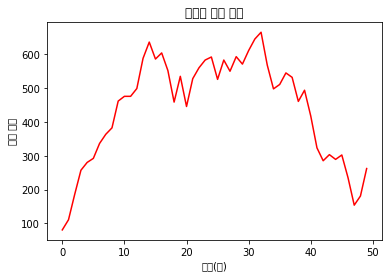

In [3]:
plt.plot(range(50), data, 'r')
mpl.rcParams['axes.unicode_minus'] = False
plt.title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')

##  4. 폰트를 설정해 주기에 앞서 설치된 matplotlib의 버전과 위치정보를 확인

In [4]:
print('버전: ', mpl.__version__)
print('설치 위치:', mpl.__file__)
print('설정 위치:', mpl.get_configdir())
print('캐시 위치:', mpl.get_cachedir())

버전:  2.1.2
설치 위치: C:\Users\DS-18-D3-001\Anaconda3\lib\site-packages\matplotlib\__init__.py
설정 위치: C:\Users\DS-18-D3-001\.matplotlib
캐시 위치: C:\Users\DS-18-D3-001\.matplotlib


##  5. terminal을 이용하여 matplotlib의 위치를 확인

In [5]:
print('설정파일 위치: ', mpl.matplotlib_fname())

설정파일 위치:  C:\Users\DS-18-D3-001\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


## 6. 설치된 폰트 확인

In [6]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# 설치된 ttf 폰트 전체갯수
print(len(font_list))

1043


In [7]:
# 시스템 폰트에서 읽어온 리스트의 상위 10개 출력

font_list[:10]

['c:\\windows\\fonts\\hanbatangb.ttf',
 'c:\\windows\\fonts\\courbi.ttf',
 'C:\\WINDOWS\\Fonts\\BMHANNA_11yrs_ttf.ttf',
 'C:\\WINDOWS\\Fonts\\GILBI___.TTF',
 'C:\\WINDOWS\\Fonts\\pala.ttf',
 'c:\\windows\\fonts\\maian.ttf',
 'C:\\WINDOWS\\Fonts\\FRAHVIT.TTF',
 'c:\\windows\\fonts\\lsansd.ttf',
 'c:\\windows\\fonts\\encr10b.ttf',
 'c:\\windows\\fonts\\hysnrl.ttf']

In [8]:
# 10개의 폰트명 출력

f = [f.name for f in fm.fontManager.ttflist]
f[:10]

['cmsy10',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'STIXSizeOneSym',
 'STIXSizeThreeSym',
 'cmmi10',
 'STIXSizeThreeSym',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'DejaVu Serif Display']

## 7. 나눔고딕을 사용할 것이므로 이름에 'Nanum'이 들어간 폰트만 가져옴.

In [9]:
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[('NanumGothic', 'C:\\WINDOWS\\Fonts\\\x7f\x7f\x7f\x7fBOLD.TTF'),
 ('Nanum Pen Script', 'c:\\windows\\fonts\\nanumpen.ttf'),
 ('Nanum Brush Script', 'C:\\WINDOWS\\Fonts\\NanumBrush.ttf'),
 ('NanumGothic', 'C:\\WINDOWS\\Fonts\\NanumGothic.ttf'),
 ('NanumMyeongjo', 'C:\\WINDOWS\\Fonts\\NanumMyeongjo.ttf'),
 ('NanumGothic', 'c:\\windows\\fonts\\\x7f\x7f\x7f\x7fbold.ttf'),
 ('NanumMyeongjo', 'c:\\windows\\fonts\\nanummyeongjoextrabold.ttf'),
 ('Nanum Brush Script', 'c:\\windows\\fonts\\nanumbrush.ttf'),
 ('NanumGothic', 'c:\\windows\\fonts\\\x7f\x7f\x7f\x7f.ttf'),
 ('NanumGothic', 'c:\\windows\\fonts\\\x7f\x7f\x7f\x7fextrabold.ttf'),
 ('NanumGothic', 'c:\\windows\\fonts\\nanumgothic.ttf'),
 ('NanumGothic', 'C:\\WINDOWS\\Fonts\\NanumGothicBold.ttf'),
 ('NanumMyeongjo', 'c:\\windows\\fonts\\nanummyeongjo.ttf'),
 ('Nanum Pen Script', 'C:\\WINDOWS\\Fonts\\NanumPen.ttf'),
 ('NanumMyeongjo', 'c:\\windows\\fonts\\nanummyeongjobold.ttf'),
 ('NanumGothic', 'c:\\windows\\fonts\\nanumgothicbold.ttf')

## 8. 폰트 사용의 3가지 방법

    1) FontProperties를 사용 - 그래프의 폰트가 필요한 항목에 지정하여 사용
    2) matplotlib.rcParams[]로 전역글꼴 설정 - 그래프에 설정을 해주어 폰트가 필요한 항목에 적용
    3) mpl.matplotlib_fname()로 읽어지는 설정 파일에 직접 기입 - 모든 노트북에 적용

### 1) FontProperties 사용 방법

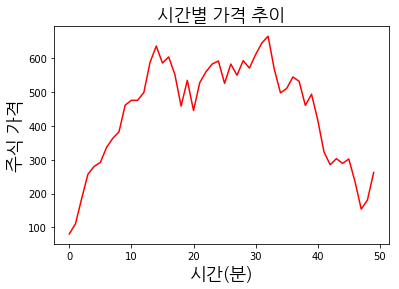

In [10]:
# fname 옵션을 사용하는 방법
path = 'c:/windows/fonts/nanumgothic.ttf'
fontprop = fm.FontProperties(fname = path, size = 18)

plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이', fontproperties = fontprop)
plt.ylabel('주식 가격', fontproperties = fontprop)
plt.xlabel('시간(분)', fontproperties = fontprop)
plt.show()

### 2) matplotlib.rcParams을 사용하여 전역글꼴 설정

In [11]:
import matplotlib.pyplot as plt

# size, famliy

print('# 설정 되어있는 폰트 사이즈')
print(plt.rcParams['font.size'])
print('# 설정 되어있는 폰트 글꼴')
print(plt.rcParams['font.family'])

# 설정 되어있는 폰트 사이즈
10.0
# 설정 되어있는 폰트 글꼴
['sans-serif']


In [12]:
# serif, sans-serif, monospace

print('serif 세리프가 있는 폰트----------')
print(plt.rcParams['font.serif'])
print('sans-serif 세리프가 없는 폰트----------')
print(plt.rcParams['font.sans-serif'])
print('monospace 고정폭 글꼴----------')
print(plt.rcParams['font.monospace'])

serif 세리프가 있는 폰트----------
['DejaVu Serif', 'Bitstream Vera Serif', 'Computer Modern Roman', 'New Century Schoolbook', 'Century Schoolbook L', 'Utopia', 'ITC Bookman', 'Bookman', 'Nimbus Roman No9 L', 'Times New Roman', 'Times', 'Palatino', 'Charter', 'serif']
sans-serif 세리프가 없는 폰트----------
['DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif']
monospace 고정폭 글꼴----------
['DejaVu Sans Mono', 'Bitstream Vera Sans Mono', 'Computer Modern Typewriter', 'Andale Mono', 'Nimbus Mono L', 'Courier New', 'Courier', 'Fixed', 'Terminal', 'monospace']


In [13]:
plt.rcParams['font.family'] = 'Nanum Pen Script' #fname을 입력
plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = (14,4)

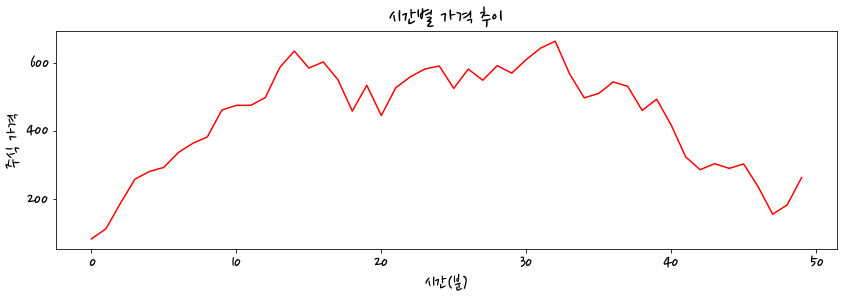

In [14]:
plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')
plt.style.use('seaborn-pastel')
plt.show()

### rcParams를 설정파일에 직접 입력 - 모든 노트북에 공통적용

In [15]:
print('설정파일 위치: ', mpl.matplotlib_fname())

설정파일 위치:  C:\Users\DS-18-D3-001\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


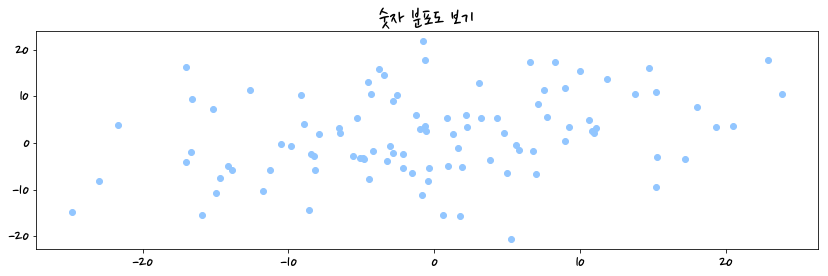

In [16]:
# import matplotlib.pyplot as plt
# import numpy as np

fig, ax = plt.subplots()
ax.plot(10*np.random.randn(100), 10*np.random.randn(100),'o')
ax.set_title('숫자 분포도 보기')
plt.show()